In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path_to_csv1 = input("Enter the path to the first CSV file: ")
path_to_csv2 = input("Enter the path to the second CSV file: ")

# Read CSV
df = pd.read_csv(path_to_csv1)
df2 = pd.read_csv(path_to_csv2)

In [3]:
ROLLING_WINDOW = 100
INDIVIDUAL_RAW_PLOT = "scatter" # "scatter" or "line"
COMPARISON_RAW_PLOT = "line" # "scatter" or "line"

def plot_complexity_profile(df, raw="scatter"):
    # Use pandas Series directly
    lengths = df['position']
    bps = df['complexity']

    # Check for valid data
    if lengths.empty or bps.empty:
        print("Skipping plot due to lack of valid data.")
    else:
        rolling_window = ROLLING_WINDOW  # for smoothing

        # Compute rolling average
        df['Smoothed'] = bps.rolling(window=rolling_window, min_periods=1).mean()

        # Statistics
        mean_bps = bps.mean()
        std_bps = bps.std()
        max_bps = bps.max()
        min_bps = bps.min()

        # Plotting
        plt.figure(figsize=(14, 7))

        # Raw BPS line (faint)
        if raw == "scatter":
            sns.scatterplot(
                x=df["position"],
                y=df["complexity"],
                alpha=0.2,
                color="cyan",
                s=20,
                label="Raw Data"
            )
        elif raw == "line":
            plt.plot(lengths, bps, color='blue', alpha=0.2, label='Raw BPS')

        # Smoothed BPS line
        plt.plot(lengths, df['Smoothed'], color='blue', linewidth=2, label=f'Moving Average (window={rolling_window})')

        # Max uncertainty line
        plt.axhline(2.0, color='gray', linestyle='--', linewidth=1, label='Maximum Uncertainty (2 bits)')

        # Mean line
        plt.axhline(mean_bps, color='green', linestyle='--', linewidth=1, label=f"Mean BPS: {mean_bps:.3f} bits")

        # Add statistics box
        stats_text = (
            f"Statistics:\n"
            f"Mean BPS: {mean_bps:.3f} bits\n"
            f"Min BPS: {min_bps:.3f} bits\n"
            f"Max BPS: {max_bps:.3f} bits\n"
            f"Std Dev: {std_bps:.3f} bits"
        )
        plt.text(0.01, 0.95, stats_text, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

        # Labels and grid
        plt.xlabel("Position", fontsize=12)
        plt.ylabel("Bits Per Symbol (BPS)", fontsize=12)
        plt.title("Complexity Profile: perfil_complexidade.csv", fontsize=14)
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend(loc='upper right', frameon=True)

        plt.tight_layout()
        plt.show()


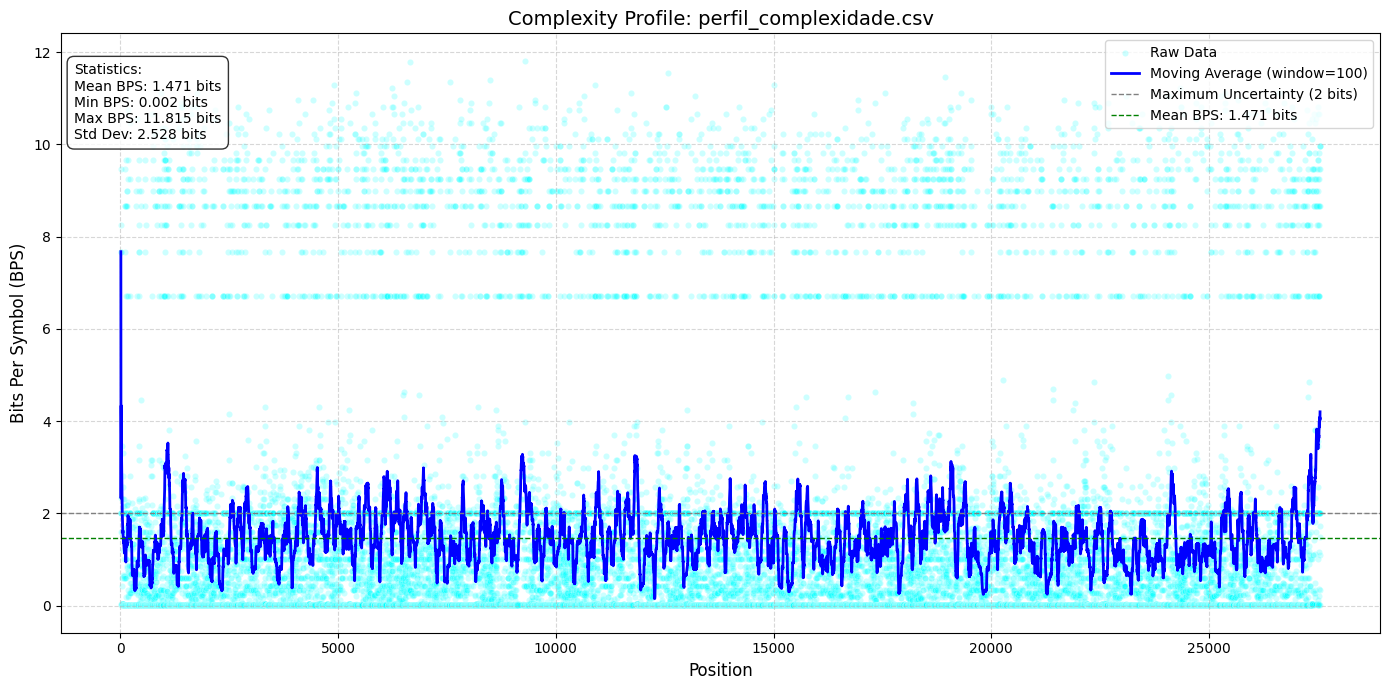

In [4]:
plot_complexity_profile(df, raw=INDIVIDUAL_RAW_PLOT)


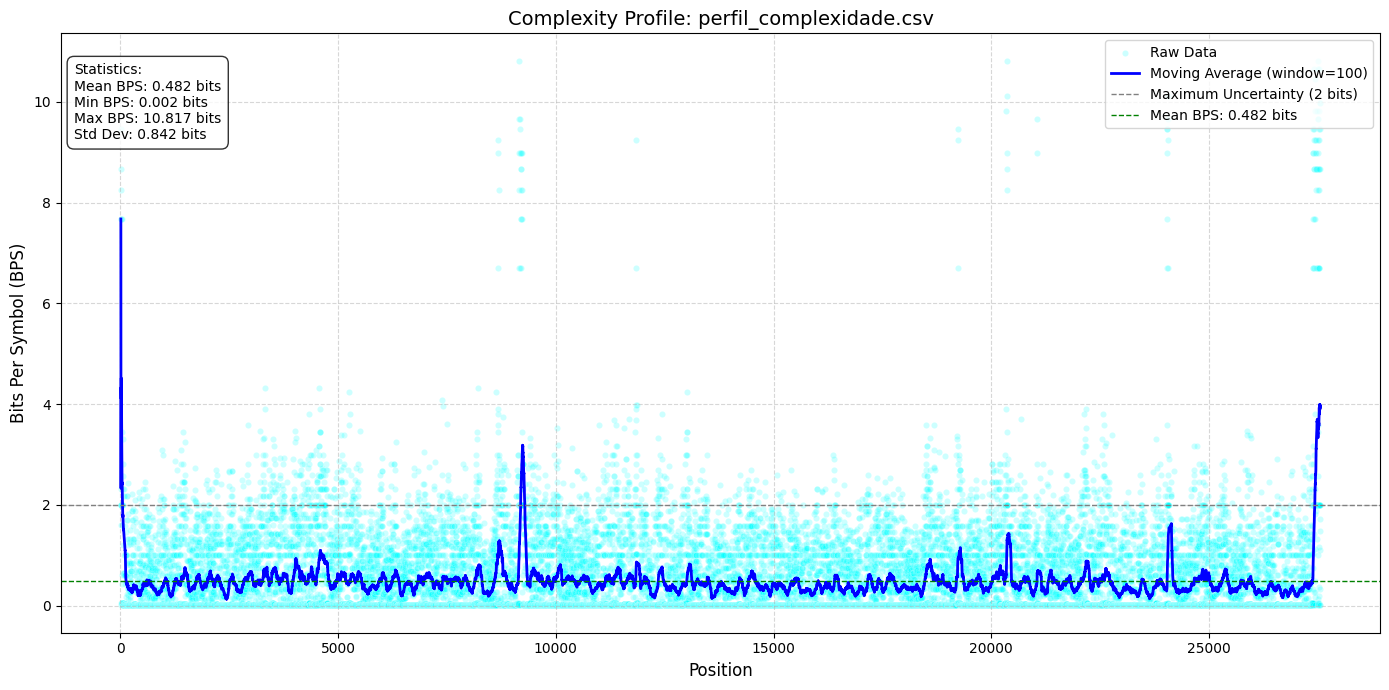

In [5]:
plot_complexity_profile(df2, raw=INDIVIDUAL_RAW_PLOT)

In [6]:
def compare_complexity_profile(df_blue, df_red, raw="scatter"):
    def process_df(df, color, label_prefix):
        lengths = df['position']
        bps = df['complexity']
        if lengths.empty or bps.empty:
            print(f"Skipping plot for {label_prefix} due to lack of valid data.")
            return None

        rolling_window = ROLLING_WINDOW
        df['Smoothed'] = bps.rolling(window=rolling_window, min_periods=1).mean()
        stats = {
            "lengths": lengths,
            "bps": bps,
            "smoothed": df['Smoothed'],
            "mean": bps.mean(),
            "std": bps.std(),
            "min": bps.min(),
            "max": bps.max(),
            "color": color,
            "label_prefix": label_prefix
        }
        return stats

    stats_blue = process_df(df_blue.copy(), 'blue', 'Blue')
    stats_red = process_df(df_red.copy(), 'red', 'Red')

    if not stats_blue and not stats_red:
        print("No valid data to plot.")
        return

    plt.figure(figsize=(14, 7))

    for stats in [stats_blue, stats_red]:
        if not stats:
            continue

        # Raw data
        if raw == "scatter":
            sns.scatterplot(
                x=stats["lengths"],
                y=stats["bps"],
                alpha=0.2,
                color=stats["color"],
                s=20,
                label=f'{stats["label_prefix"]} Raw'
            )
        elif raw == "line":
            plt.plot(
                stats["lengths"],
                stats["bps"],
                color=stats["color"],
                alpha=0.1,
                label=f'{stats["label_prefix"]} Raw'
            )

        # Smoothed line
        plt.plot(
            stats["lengths"],
            stats["smoothed"],
            color=stats["color"],
            linewidth=2,
            label=f'{stats["label_prefix"]} Smoothed'
        )

        # Mean line
        plt.axhline(
            stats["mean"],
            color=stats["color"],
            linestyle='--',
            linewidth=1,
            label=f'{stats["label_prefix"]} Mean: {stats["mean"]:.3f} bits'
        )

    # Max uncertainty line
    plt.axhline(2.0, color='gray', linestyle='--', linewidth=1, label='Maximum Uncertainty (2 bits)')

    # Statistics box (just show blue's by default)
    if stats_blue:
        stats_text = (
            f"{stats_blue['label_prefix']} Statistics:\n"
            f"Mean BPS: {stats_blue['mean']:.3f} bits\n"
            f"Min BPS: {stats_blue['min']:.3f} bits\n"
            f"Max BPS: {stats_blue['max']:.3f} bits\n"
            f"Std Dev: {stats_blue['std']:.3f} bits"
        )
        plt.text(0.01, 0.95, stats_text, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

    plt.xlabel("Position", fontsize=12)
    plt.ylabel("Bits Per Symbol (BPS)", fontsize=12)
    plt.title("Complexity Profile Comparison", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc='upper right', frameon=True)

    plt.tight_layout()
    plt.show()


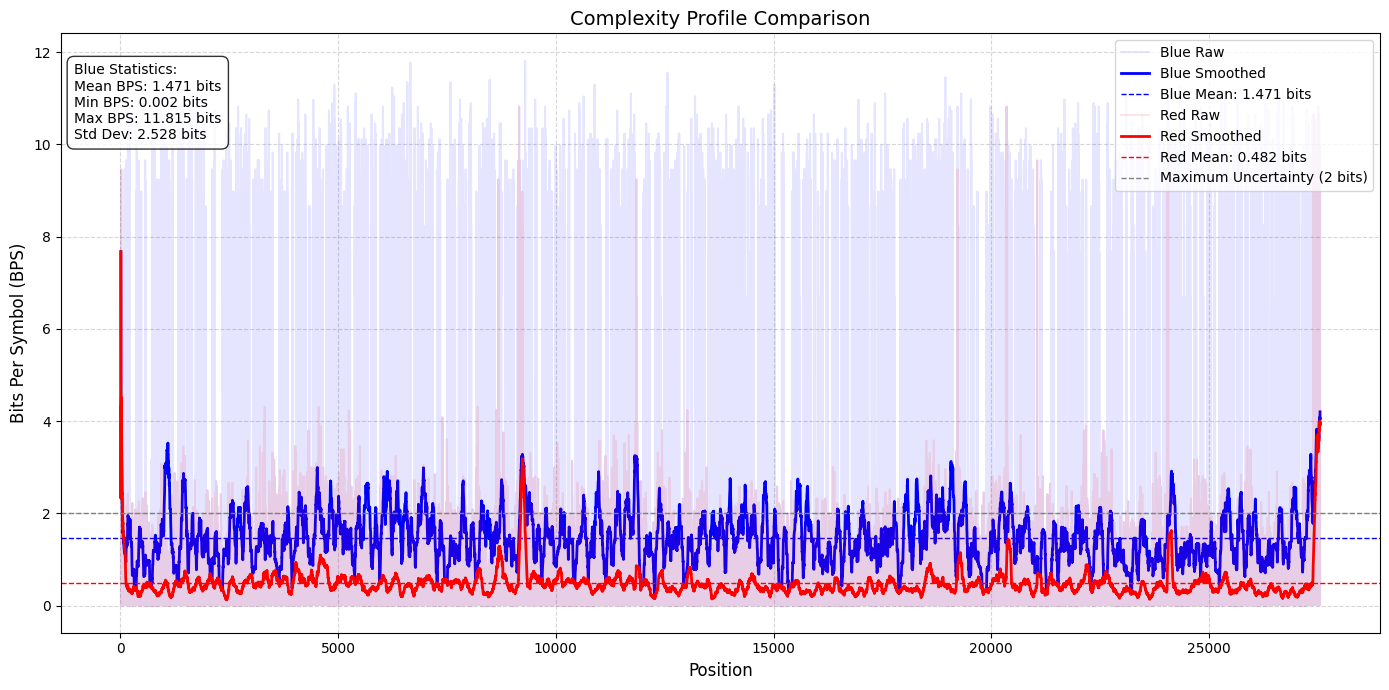

In [7]:
compare_complexity_profile(df, df2, raw=COMPARISON_RAW_PLOT)